In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train=pd.read_csv("../datasets/titanic/train.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print( train.info())
print("describe>", train.describe())
print(train["Survived"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
describe>        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import seaborn as sns 

<Axes: xlabel='Survived', ylabel='count'>

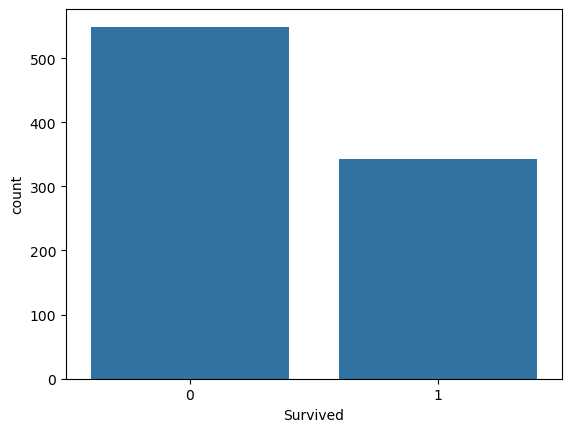

In [39]:
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Sex', ylabel='Survived'>

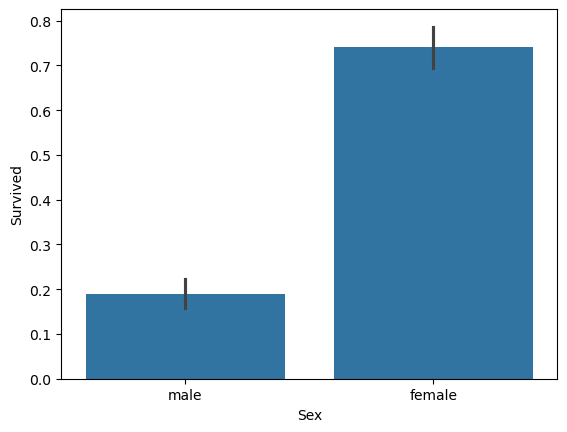

In [40]:
sns.barplot(x='Sex', y='Survived', data=train)


<Axes: xlabel='Embarked', ylabel='Survived'>

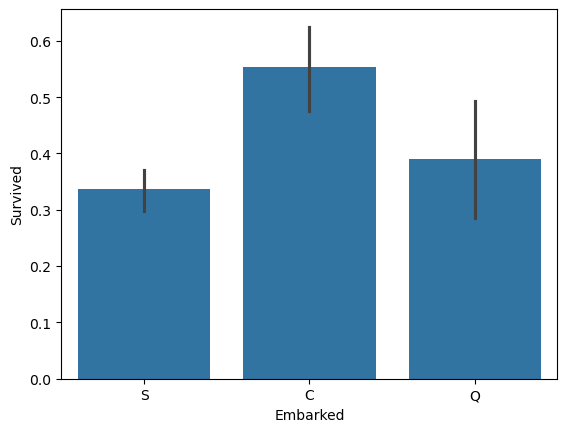

In [41]:

sns.barplot(x='Embarked', y='Survived', data=train)


<Axes: xlabel='Age', ylabel='Count'>

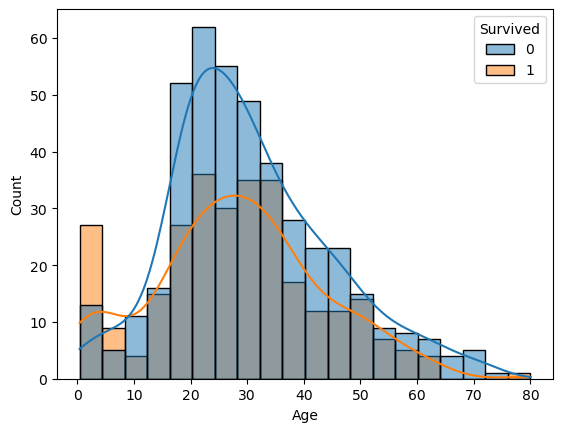

In [42]:
sns.histplot(data=train, x='Age', hue='Survived', kde=True)


<Axes: xlabel='Survived', ylabel='Age'>

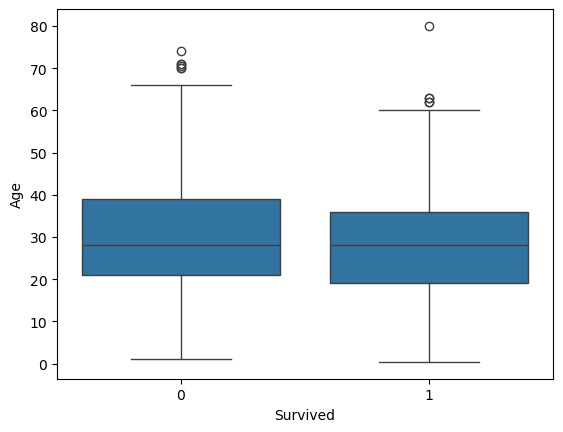

In [43]:
sns.boxplot(x='Survived', y='Age', data=train)


<Axes: xlabel='Fare', ylabel='Count'>

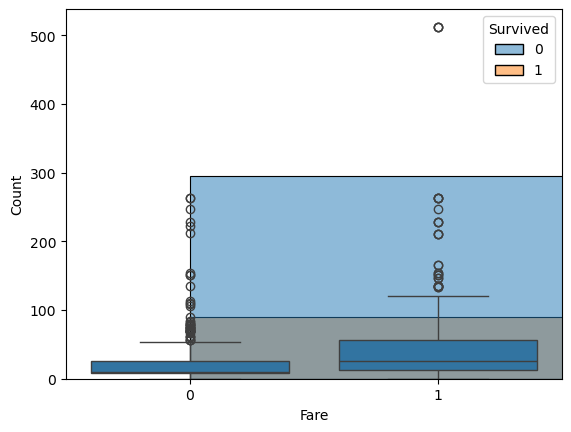

In [44]:
sns.histplot(data=train, x='Fare', hue='Survived', bins=40)
sns.boxplot(x='Survived', y='Fare', data=train)


In [45]:
X=train.drop(["Survived"], axis=1)
y=train["Survived"]

In [57]:
obj_cols = ['Name', 'Ticket', 'Cabin']

X = X.drop(columns=obj_cols)


In [58]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=20,
    random_state=42,
)

In [59]:
from sklearn.impute import SimpleImputer

cat_cols = ['Sex', 'Embarked']
num_cols = ['Age', 'Fare', 'Pclass']


num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# numeric
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols]   = num_imputer.transform(X_val[num_cols])

# categorical
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols]   = cat_imputer.transform(X_val[cat_cols])



In [ ]:
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)

In [61]:
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

In [62]:
X_train.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
294,295,3.0,24.0,0,0,7.8958,True,False,True
447,448,1.0,34.0,0,0,26.5500,True,False,True
192,193,3.0,19.0,1,0,7.8542,False,False,True
682,683,3.0,20.0,0,0,9.2250,True,False,True
538,539,3.0,28.0,0,0,14.5000,True,False,True


In [63]:
X_train.select_dtypes(include='object').columns


Index([], dtype='object')

In [64]:
model= LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [66]:
y_pred = model.predict(X_val)

accuracy_score(y_val, y_pred)


0.9

In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)


array([[10,  0],
       [ 2,  8]])

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [69]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_prob)


0.8899999999999999

In [71]:
test = pd.read_csv('../datasets/titanic/test.csv')

drop_cols = ['Name', 'Ticket', 'Cabin', 'PassengerId']

X_test = test.drop(columns=[c for c in drop_cols if c in test.columns ])

In [72]:
passenger_id = test['PassengerId']
X_test = test.drop(columns=['Name', 'Ticket', 'Cabin'])


In [73]:
X_test[num_cols] = num_imputer.transform(X_test[num_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [75]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [82]:
test_pred = model.predict(X_test)

In [77]:
test_pred = model.predict(X_test)

In [78]:
submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Survived': test_pred
})


In [79]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [81]:
submission.to_csv('../datasets/titanic/submission.csv', index=False)

print("DONE")


DONE
